# 1. Introduction
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
<br>
<br>
Dataset source: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
<br>
<br>
The following variables are present in this dataset:
* age
* anaemia - Decrease of red blood cells or hemoglobin (boolean)
* creatinine_phosphokinase - Level of the CPK enzyme in the blood (mcg/L)
* diabetes - If the patient has diabetes (boolean)
* ejection_fraction - Percentage of blood leaving the heart at each contraction (percentage)
* high_blood_pressure - If the patient has hypertension (boolean)
* platelets - Platelets in the blood (kiloplatelets/mL)
* serum_creatinine - Level of serum creatinine in the blood (mg/dL)
* serum_sodium - Level of serum sodium in the blood (mEq/L)
* sex - Woman or man (binary)
* smoking -If the patient smokes or not (boolean)
* time -nFollow-up period (days)
* DEATH_EVENT - If the patient deceased during the follow-up period (boolean) 

# 2. Data Preparation
This is where we ensure the data is "clean" and will not cause issues or unexpected results due to missing values, duplicated values, wrong data type, outliers, etc.

In [1]:
# loading libraries and customizing settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max.columns', None)

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 6)

In [2]:
# loading and previewing dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
118,65.0,1,113,1,60,1,203000.0,0.9,140,0,0,94,0
51,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
31,85.0,0,23,0,45,0,360000.0,3.0,132,1,0,28,1
165,80.0,0,776,1,38,1,192000.0,1.3,135,0,0,130,1
217,54.0,1,427,0,70,1,151000.0,9.0,137,0,0,196,1


In [3]:
# checking dataset basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


This dataset has 299 records and 13 variables of which the last one, 'DEATH_EVENT' is the target variable. We can also see that there are no missing values.

In [4]:
# checking for duplicated records 
df.duplicated().any()

False

In [5]:
# checking the values to ensure there are no anomalies
columns = list(df.columns)

for column in columns:
    print("Exploring variable: {}".format(column))
    print("Number of unique values: {}".format(df[column].nunique()))
    print(df[column].unique())
    print()

Exploring variable: age
Number of unique values: 47
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]

Exploring variable: anaemia
Number of unique values: 2
[0 1]

Exploring variable: creatinine_phosphokinase
Number of unique values: 208
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  

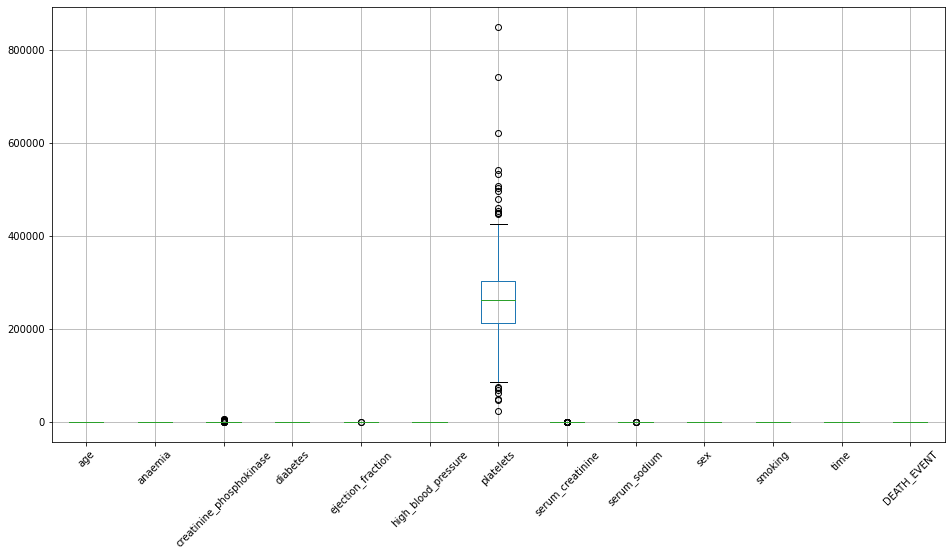

In [6]:
plt.figure(figsize = (16, 8))
df.boxplot(columns)
plt.xticks(rotation = 45)
plt.show()

The 'platelets' variable has a lot of outliers. This will affect classification algorithms such as logistic regression which are highly susceptible to outliers.

# 3. Exploratory Data Analysis
This is done to better understand our data so we can know which algorithm would be appropriate for it.

In [7]:
# previewing the summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


From the above summary statistics, we can see that some variables have quote a wide range of values such as 'creatinine_phosphokinase' (23-7861), 'platelets' (25100-850000), and so on. This can be quite problematic as the machine learning algorithm or algorithms will assume larger values carry more weight, i.e., are more important. So we will need to standardize the features before we carry out modeling.

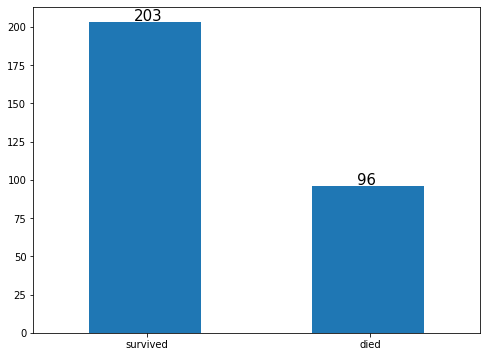

In [8]:
# distribution of patients who died
ax = df.DEATH_EVENT.value_counts().plot(kind = 'bar', rot = 0)
for i in ax.patches:
    ax.text(i.get_x() + 0.2, i.get_height() + 1, 
           str(round(i.get_height(), 2)), fontsize = 15)
    
plt.xticks(ticks = [0.01, 1.01], labels = ['survived', 'died'])
plt.show()

This data set is unbalanced in that there are way more patients who did not die compared to those who died.

In [9]:
# distribution of age
df.groupby('DEATH_EVENT').age.describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,58.761906,10.637890,40.0,50.0,60.0,65.0,90.0
1,96.0,65.215281,13.214556,42.0,55.0,65.0,75.0,95.0


Of the patients who died, their ages ranged from 42 to 95 while those who didn't die were between 40-90 years. Additionally, those who died had a higher mean age than those who survived.

In [10]:
df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

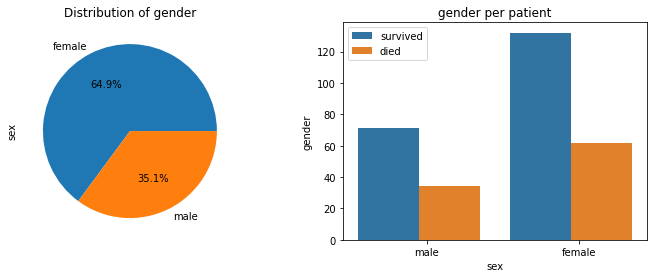

In [11]:
# distribution of gender
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
df.sex.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels = ['female', 'male'])
plt.title('Distribution of gender')

plt.subplot(1, 2, 2)
gender = sns.countplot('sex', hue = 'DEATH_EVENT', data = df)
gender.set(title = "gender per patient", ylabel = 'gender')
plt.xticks(ticks = [0.05, 1.05], labels = ['male', 'female'])
plt.legend(labels = ['survived', 'died'])

plt.show()

This data set has more women than men, so naturally, more women than men both survived and died.

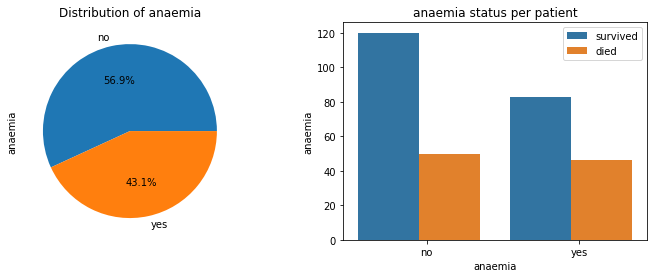

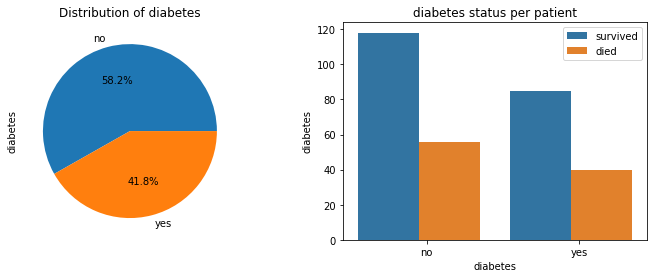

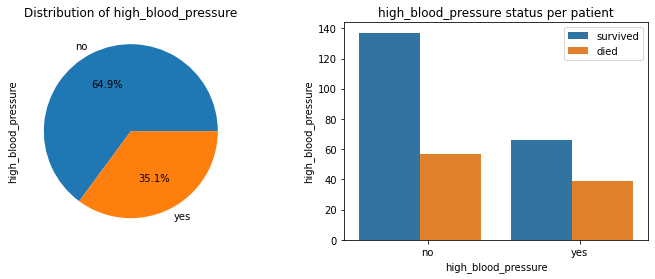

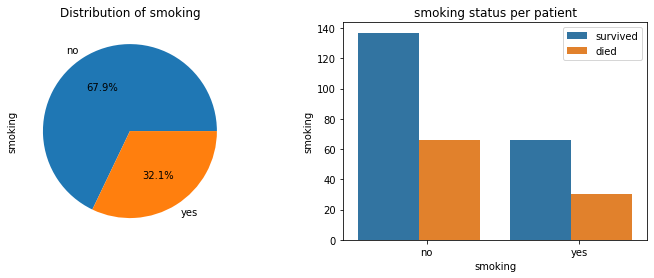

In [12]:
# exploring the distributions of anaemia, diabetes, high blood pressure, and smoking
conditions = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

for condition in conditions:
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
    
    plt.subplot(1, 2, 1)
    df[condition].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels = ['no', 'yes'])
    plt.title('Distribution of {}'.format(condition))

    plt.subplot(1, 2, 2)
    condition_plot = sns.countplot(condition, hue = 'DEATH_EVENT', data = df)
    condition_plot.set(title = "{} status per patient".format(condition), 
                       ylabel = '{}'.format(condition))
    plt.xticks(ticks = [0.05, 1.05], labels = ['no', 'yes'])
    plt.legend(labels = ['survived', 'died'])

    plt.show()

For the variables of 'anaemia', 'diabetes', 'high_blood_pressure', and 'smoking', we see that majority of the patients reported 'no' on them. Accordingly, the number of patients who survived and died are lower for those who reported 'yes' than those who reported 'no'.

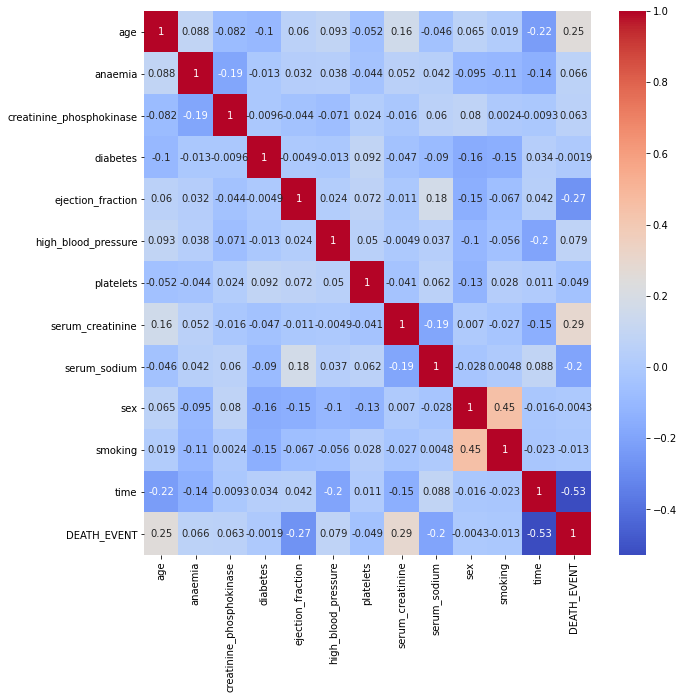

In [13]:
# previewing the correlations between the variables
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

The 'sex' and 'smoking' variables appear to be moderately positively correlated with each other, while 'time' and 'DEATH_EVENT' are moderately negatively correlated with each other.

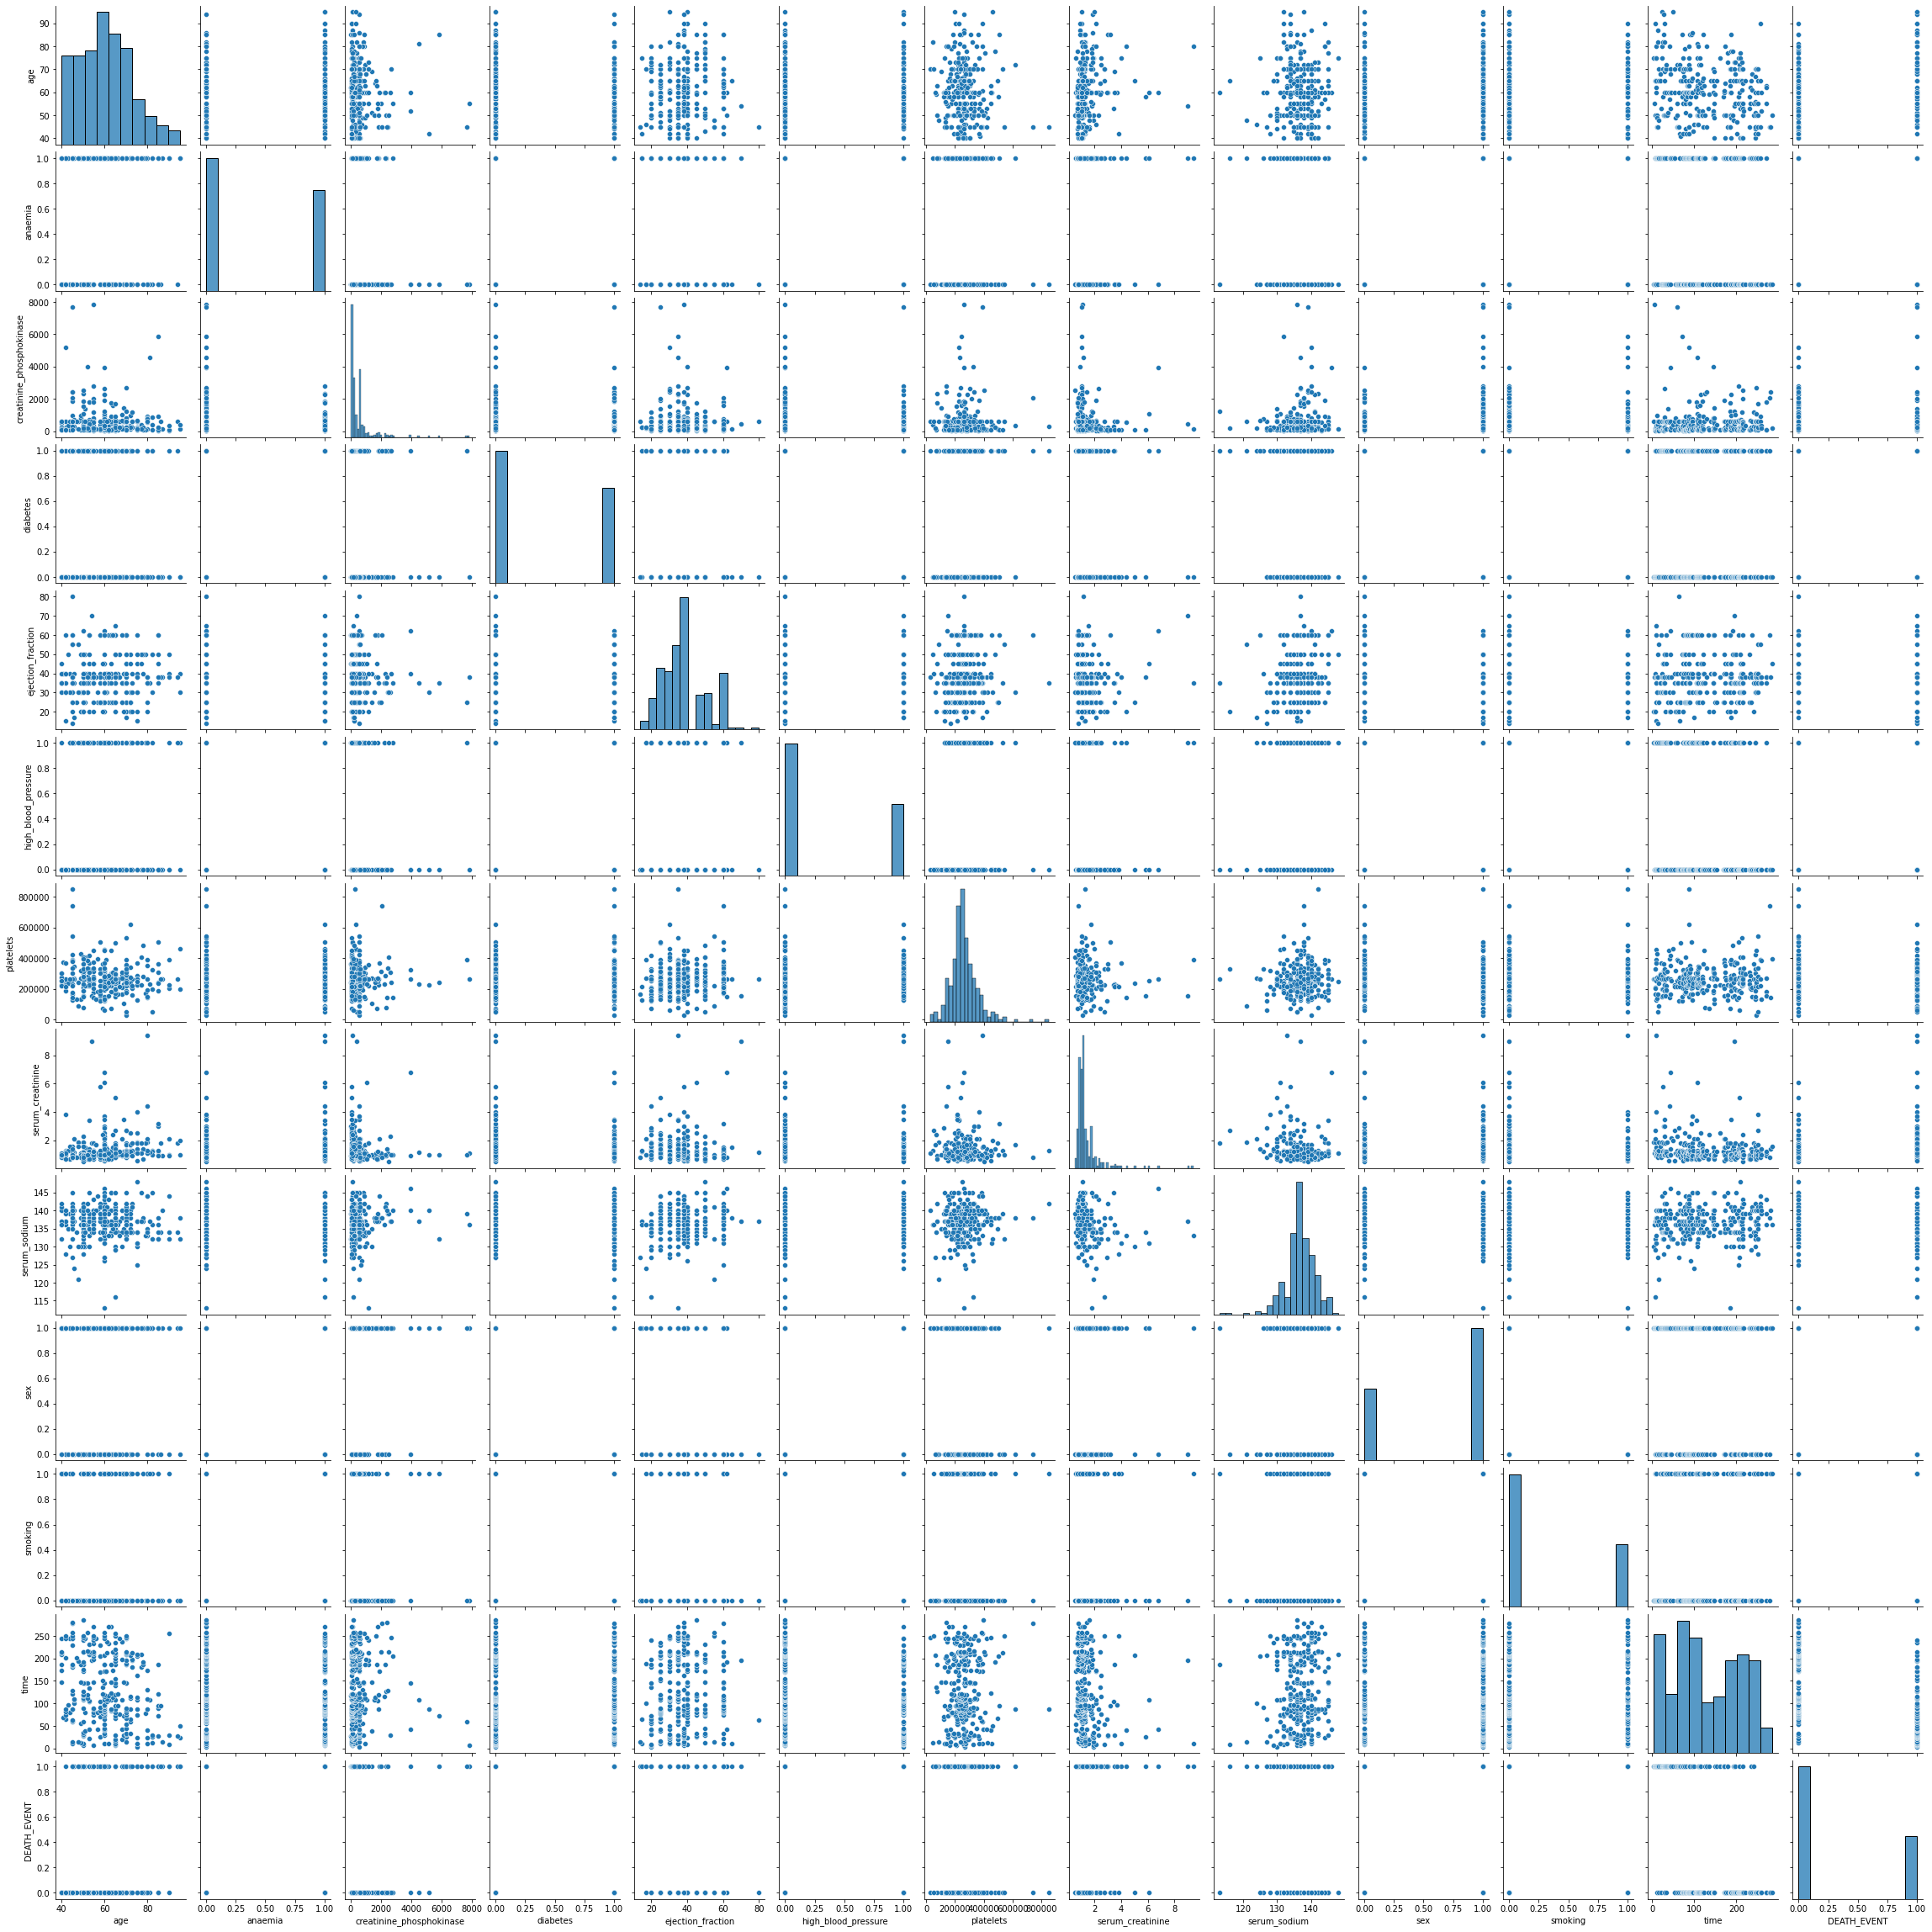

In [14]:
# checking for linearity
sns.pairplot(df, kind = 'scatter')
plt.show()

There does not seem to be a specific relationship between the variables, much less a linear one, so logistic regression is out of the question.

# 4. Data Modeling
There are numerous machine learning algorithms that we can use. Since our target variable consists of two discerete values (0 - did not die, 1 - died), our task falls under classification. We will attempt the following basic classification algorithms as is, that is, without optimizing them:
* Naive Bayes classification
* K-Nearest Neighbors classification
* Random Forest classification
* Support Vector Machine classification

## 4.1 Data Preprocessing
Here we will separate our target variable from the features, and also scale the independent variables. We will also split the data set into 80% training set and 20% test set.

In [15]:
# shuffling our data set
df = df.sample(frac = 1)

# separating features and target
X = df.drop(columns = ['DEATH_EVENT']).values
y = df.DEATH_EVENT.values

In [16]:
# splitting into training and test sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, stratify = df['DEATH_EVENT'])

In [17]:
# scaling our features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4.2 Modeling

### 4.2.1 Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

### 4.2.2 K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

### 4.2.3 Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

### 4.2.4 Support Vector Machine

In [21]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

## 4.3 Model Evaluation
We will assess how the model performed using the classification report and the confusion matrix.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

classifiers = ['Gaussian Naive Bayes Classifier', 'K-Nearest Neighbors Classifier',
               'Random Forest Classifier', 'Support Vector Machine Classifier']
predictions = [nb_pred, knn_pred, rf_pred, svc_pred]

for classifier, prediction in zip(classifiers, predictions):
    print("Showing results for {}".format(classifier))
    print("Confusion matrix:\n", confusion_matrix(y_test, prediction))
    print("Classification report:\n", classification_report(y_test, prediction))
    print('-' * 75)

Showing results for Gaussian Naive Bayes Classifier
Confusion matrix:
 [[40  1]
 [14  5]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84        41
           1       0.83      0.26      0.40        19

    accuracy                           0.75        60
   macro avg       0.79      0.62      0.62        60
weighted avg       0.77      0.75      0.70        60

---------------------------------------------------------------------------
Showing results for K-Nearest Neighbors Classifier
Confusion matrix:
 [[39  2]
 [13  6]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        41
           1       0.75      0.32      0.44        19

    accuracy                           0.75        60
   macro avg       0.75      0.63      0.64        60
weighted avg       0.75      0.75      0.71        60

-------------------------------------------

# 5. Conclusion
We see that the Random Forest Classifier outperformed the other classifiers in terms of accuracy, followed by the Support Vector Machine Classifier. The Random Forest Classifier also performed extremely well on precision and recall.

However, we should not be too quick to conclude that this model is perfect. We are yet to optimize the hyperparameters as well as obtain a deeper, detailed understanding of the independent variables and how exactly they contribute to cardiovascular diseases. Furthermore, there are still plenty of other algorithms that could probably do a better job such as neural networks so they should be looked into.